In [97]:
import bayesian_cart as BC 
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import random


In [37]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
full_data = load_breast_cancer()
feature_names = full_data.feature_names
labels_names = full_data.target_names

In [38]:
df = load_breast_cancer()
feature = df.data
label = df.target
X_train, X_test, y_train, y_test = train_test_split(feature, label)

In [39]:
# (alpha, beta, prob)
small_search = (0.001, 0.5, [0.1,0.1,0.4,0.4])
medium_search = (0.5, 0.5, [0.2,0.2,0.3,0.3])
big_search = (0.95, 0.5, [0.25,0.25,0.25,0.25])


In [43]:
alpha, beta, prob = medium_search
bayesian_tree = BC.BayesianDecisionTree(alpha = alpha , beta = beta, prob = prob)
bayesian_tree.fit(200,X_train,y_train)

In [44]:
path = bayesian_tree.path
accuracy_train = bayesian_tree.path_acurracy(X_train,y_train)
accuracy_test = bayesian_tree.path_acurracy(X_test,y_test)

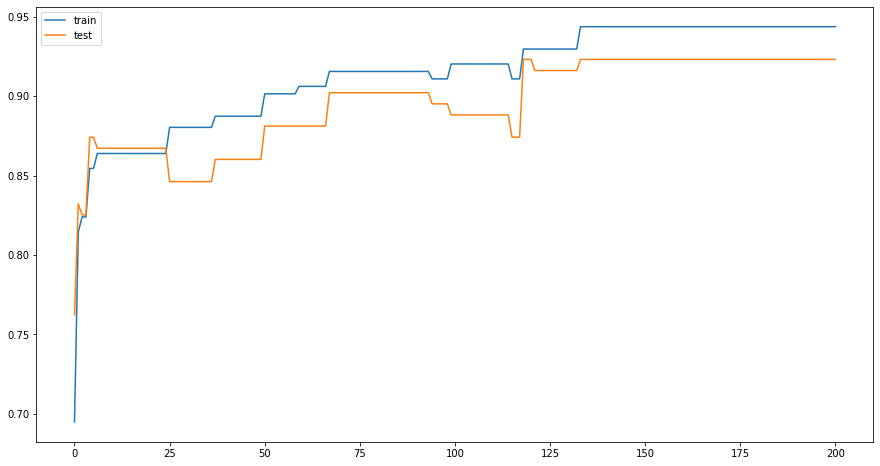

In [45]:
figure = plt.figure(figsize = (15,8))
plt.plot(list(range(len(accuracy_train))),accuracy_train, label = "train")
plt.plot(list(range(len(accuracy_test))),accuracy_test, label = "test")
plt.legend()
# plt.xscale("log")

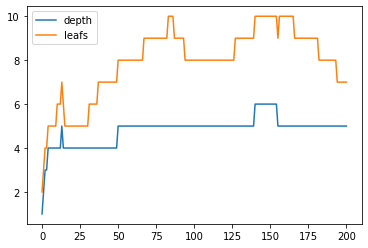

In [46]:
path_info = bayesian_tree.path_info()
plt.plot(path_info[:,0] ,label="depth" )
plt.plot(path_info[:,1] ,label="leafs" )
plt.legend()

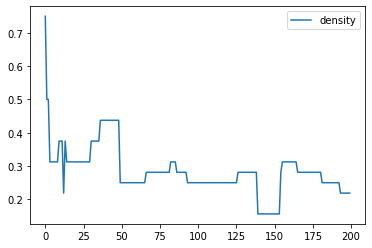

In [47]:
plt.plot(path_info[1:,1]/(2**path_info[1:,0]) ,label="density" )
plt.legend()

In [48]:
idx_test_max = np.argmax(accuracy_test)
idx_train_max = np.argmax(accuracy_train)
best_tree = bayesian_tree.path[idx_test_max]
best_tree.set_labels(feature_names,labels_names)
print(f"El mejor acurracy de testeo fue : {accuracy_test[idx_test_max]}")
# best_tree.save_img("Arboles5/1")


El mejor acurracy de testeo fue : 0.9230769230769231


In [49]:
print("Descisiones aceptadas: ")
np.array(bayesian_tree.choices)[bayesian_tree.chosen]

Descisiones aceptadas: 


array(['start', 'grow', 'grow', 'grow', 'change', 'grow', 'grow', 'prune',
       'prune', 'swap', 'change', 'change', 'grow', 'grow', 'change',
       'grow', 'change', 'swap', 'swap', 'grow', 'swap', 'grow', 'prune',
       'swap', 'prune', 'change', 'swap', 'swap', 'swap', 'change',
       'swap', 'change', 'change', 'grow', 'swap', 'change', 'swap',
       'grow', 'swap', 'change', 'prune', 'grow', 'change', 'prune',
       'prune', 'prune'], dtype='<U6')

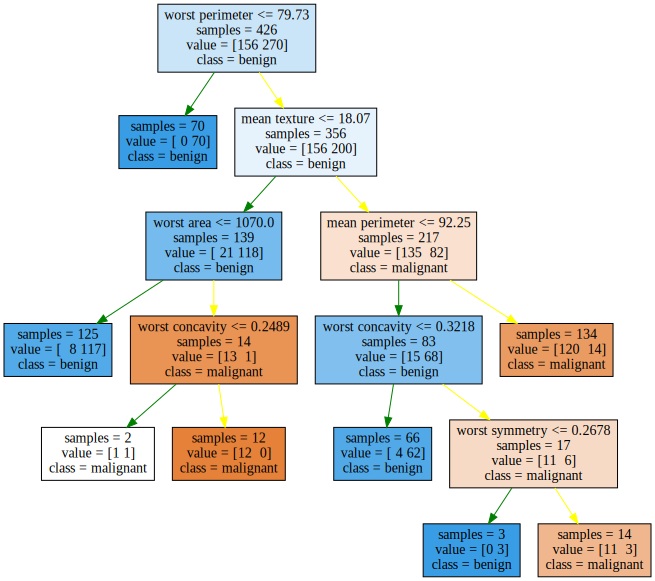

In [50]:
best_tree.graph_desiciontree()

In [51]:
# if not os.path.isdir("Change"):
#     os.mkdir("Change")
# for i,tree_chage in enumerate(bayesian_tree.tree_changes()):
#     tree_chage.save_img_hd(f"Change/{i}")

### Dataset de iris

In [52]:
iris = datasets.load_iris()
feature_names_iris = iris.feature_names
labels_names_iris = iris.target_names
X_iris = iris.data  # we only take the first two features.
y_iris = iris.target
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state= 42)

In [64]:
alpha, beta, prob = small_search
bayesian_tree_iris = BC.BayesianDecisionTree(alpha = alpha, beta = beta, prob = prob)
bayesian_tree_iris.fit(300,X_iris_train,y_iris_train)

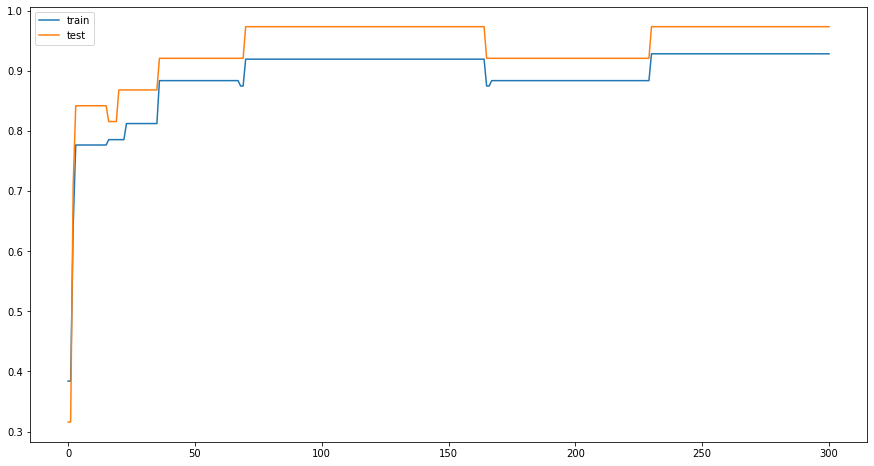

In [65]:
path_iris = bayesian_tree_iris.path
accuracy_iris_test = []
accuracy_iris_train = []
for i,tree in enumerate(path_iris):
    accuracy_iris_test.append(accuracy_score(tree.predict(X_iris_test), y_iris_test))
    accuracy_iris_train.append(accuracy_score(tree.predict(X_iris_train), y_iris_train))

figure = plt.figure(figsize = (15,8))
plt.plot(list(range(len(accuracy_iris_train))), accuracy_iris_train, label = "train")
plt.plot(list(range(len(accuracy_iris_test))), accuracy_iris_test, label = "test")
plt.legend()
# plt.xscale("log")

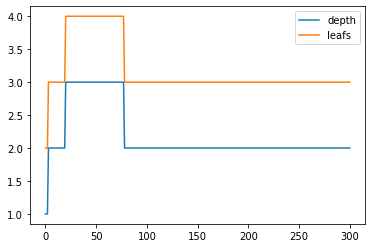

In [66]:
path_info_iris = bayesian_tree_iris.path_info()
plt.plot(path_info_iris[:,0] ,label="depth" )
plt.plot(path_info_iris[:,1] ,label="leafs" )
plt.legend()

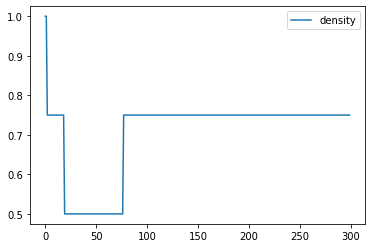

In [67]:
plt.plot(path_info_iris[1:,1]/(2**path_info_iris[1:,0]) ,label="density" )
plt.legend()

In [68]:
idx_test_max_iris = np.argmax(accuracy_iris_test)
idx_train_max_iris = np.argmax(accuracy_iris_train)
best_tree_iris = path_iris[idx_test_max_iris]
best_tree_iris.set_labels(feature_names_iris,labels_names_iris)
print(accuracy_iris_test[idx_test_max_iris])


0.9736842105263158


In [69]:
print("Descisiones aceptadas: ")
np.array(bayesian_tree_iris.choices)[bayesian_tree_iris.chosen]

Descisiones aceptadas: 


array(['start', 'change', 'grow', 'change', 'grow', 'change', 'change',
       'swap', 'swap', 'change', 'change', 'swap', 'change', 'change',
       'prune', 'change', 'change', 'change', 'change', 'change',
       'change'], dtype='<U6')

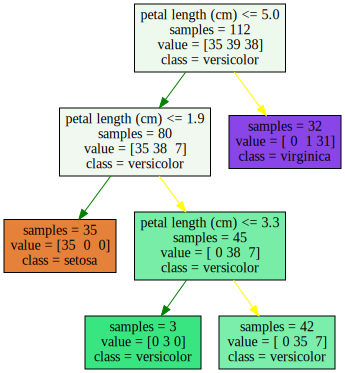

In [70]:
best_tree_iris.graph_desiciontree()

### Dataset de Digits

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

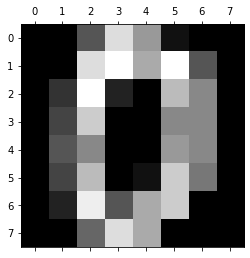

In [72]:
from sklearn.datasets import load_digits
digits=load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
print(digits.images[0])
plt.show() 

In [77]:
n_samples = len(digits.images)
data_digit = digits.images.reshape((n_samples, -1))
digits_target = digits.target
# digits_target0 =  digits_target[digits_target==0]
# digits_target1 =  digits_target[digits_target==1]
# digits_target2 =  digits_target[digits_target==2]
# digits_target2 =  digits_target[digits_target==3]

# data_digit0 =  data_digit[digits_target==0]
# data_digit1 =  data_digit[digits_target==1]
# data_digit2 =  data_digit[digits_target==2]

# data_digit = np.concatenate((data_digit0,data_digit1,data_digit2))
# digits_target = np.concatenate((digits_target0,digits_target1,digits_target2))

X_train_digit, X_test_digit, y_train_digit, y_test_digit = train_test_split(
    data_digit, digits_target, test_size=0.5, shuffle=True , random_state=22)

In [78]:
feature_name_digit = digits.feature_names
labels_names_digit = digits.target_names

In [91]:
bayesian_tree_digit = BC.BayesianDecisionTree(alpha=0.5, beta= 0.5,prob = [0.25,0.25,0.25,0.25])
bayesian_tree_digit.fit(1500,X_train_digit ,y_train_digit)

In [79]:
# bayesian_tree_digit = BC.BayesianDecisionTree(alpha=0.000001, beta= 0.5,prob = [0.01,0.01,0.49,0.49])
# bayesian_tree_digit.fit(300,X_train_digit ,y_train_digit)

In [80]:
# bayesian_tree_digit.set_alpha(1)
# bayesian_tree_digit.set_prob([0.2,0.2,0.3,0.3])

In [81]:
# bayesian_tree_digit.fit(400,X_train_digit ,y_train_digit)

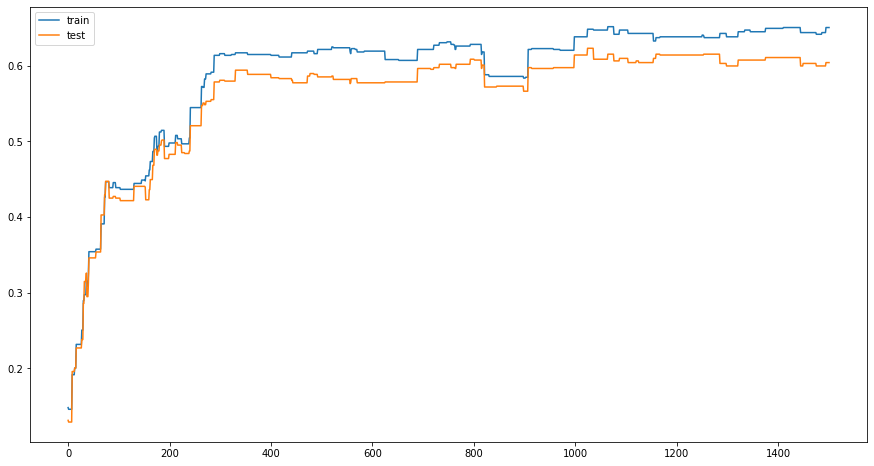

In [92]:
path_digit = bayesian_tree_digit.path
accuracy_digit_test = []
accuracy_digit_train = []
for i,tree in enumerate(path_digit):
    accuracy_digit_test.append(accuracy_score(tree.predict(X_test_digit), y_test_digit))
    accuracy_digit_train.append(accuracy_score(tree.predict(X_train_digit), y_train_digit))

figure = plt.figure(figsize = (15,8))
plt.plot(list(range(len(accuracy_digit_train))), accuracy_digit_train, label = "train")
plt.plot(list(range(len(accuracy_digit_test))), accuracy_digit_test, label = "test")
plt.legend()
# plt.xscale("log")

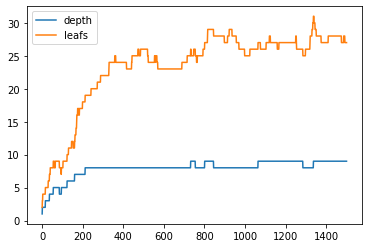

In [110]:
path_info_digit = bayesian_tree_digit.path_info()
plt.plot(path_info_digit[:,0] ,label="depth" )
plt.plot(path_info_digit[:,1] ,label="leafs" )
plt.legend()

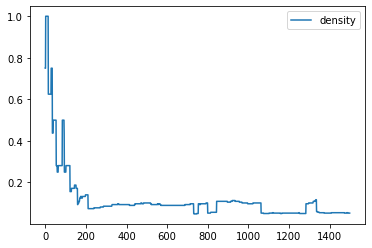

In [111]:
plt.plot(path_info_digit[1:,1]/(2**path_info_digit[1:,0]) ,label="density" )
plt.legend()

In [165]:
# bayesian_tree_digit = BayesianDecisionTree(alpha=0.08, beta= 0.4,prob = [0.1,0.1,0.4,0.4])
# bayesian_tree_digit.fit_batch(200,2,X_train_digit ,y_train_digit)

In [166]:
# path_digit = bayesian_tree_digit.path
# accuracy_digit_test = []
# accuracy_digit_train = []
# for i,tree in enumerate(path_digit):
#     accuracy_digit_test.append(accuracy_score(tree.predict(X_test_digit), y_test_digit))
#     accuracy_digit_train.append(accuracy_score(tree.predict(X_train_digit), y_train_digit))

# figure = plt.figure(figsize = (15,8))
# plt.plot(list(range(len(accuracy_digit_train))), accuracy_digit_train, label = "train")
# plt.plot(list(range(len(accuracy_digit_test))), accuracy_digit_test, label = "test")
# plt.legend()
# # plt.xscale("log")

0.6229143492769744


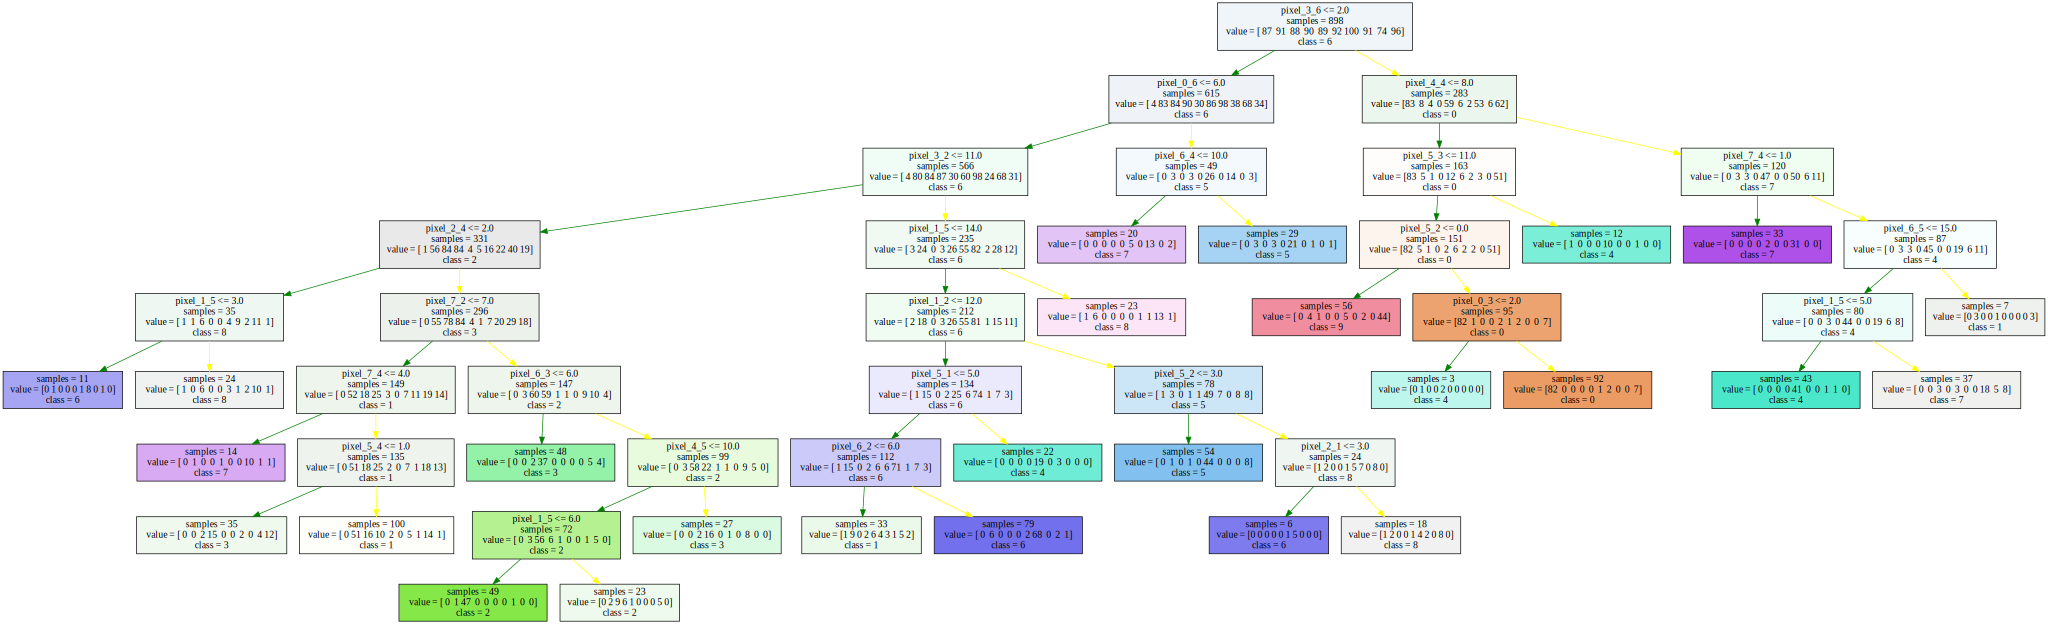

In [93]:
idx_test_max_digit = np.argmax(accuracy_digit_test)
idx_train_max_digit = np.argmax(accuracy_digit_train)
best_tree_digit = path_digit[idx_test_max_digit]
best_tree_digit.set_labels(feature_name_digit,labels_names_digit)
print(accuracy_digit_test[idx_test_max_digit])
best_tree_digit.graph_desiciontree()

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        91
           1       0.35      0.55      0.43        91
           2       0.82      0.70      0.75        89
           3       0.66      0.71      0.68        93
           4       0.78      0.77      0.78        92
           5       0.76      0.69      0.72        90
           6       0.72      0.78      0.75        81
           7       0.69      0.80      0.74        88
           8       0.39      0.32      0.35       100
           9       0.00      0.00      0.00        84

    accuracy                           0.62       899
   macro avg       0.58      0.62      0.59       899
weighted avg       0.58      0.62      0.59       899

[[84  0  0  0  3  0  3  0  1  0]
 [ 0 50  4  1  1  1 15  1 18  0]
 [ 2 17 62  4  0  2  0  2  0  0]
 [ 0 16  4 66  0  3  0  2  2  0]
 [ 3  9  0  0 71  2  0  5  2  0]
 [ 4  2  1  0  3 62  3  7  8  0]
 [ 0  7  0  0  5  0 63  0  6  0]
 [ 2  3  0

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


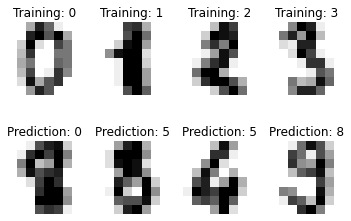

In [101]:
y_pred_digit = best_tree_digit.predict(X_test_digit)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred_digit))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print((metrics.classification_report(y_test_digit, y_pred_digit)))
print((metrics.confusion_matrix(y_test_digit, y_pred_digit)))

In [100]:
bayesian_tree_digit2 = BC.BayesianDecisionTree(alpha=0.85, beta= 0.5,prob = [0.25,0.25,0.25,0.25])
bayesian_tree_digit2.fit(1500,X_train_digit ,y_train_digit)

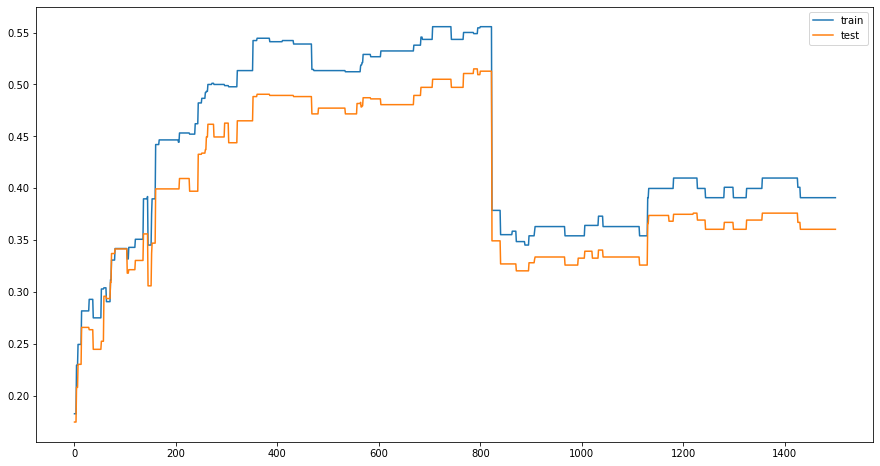

In [107]:
path_digit2 = bayesian_tree_digit2.path
accuracy_digit_test2 = bayesian_tree_digit2.path_acurracy(X_test_digit,y_test_digit)
accuracy_digit_train2 = bayesian_tree_digit2.path_acurracy(X_train_digit,y_train_digit)

figure = plt.figure(figsize = (15,8))
plt.plot(list(range(len(accuracy_digit_train2))), accuracy_digit_train2, label = "train")
plt.plot(list(range(len(accuracy_digit_test2))), accuracy_digit_test2, label = "test")
plt.legend()
# plt.xscale("log")

In [106]:
max(accuracy_digit_test2)

0.5150166852057843

0.5150166852057843


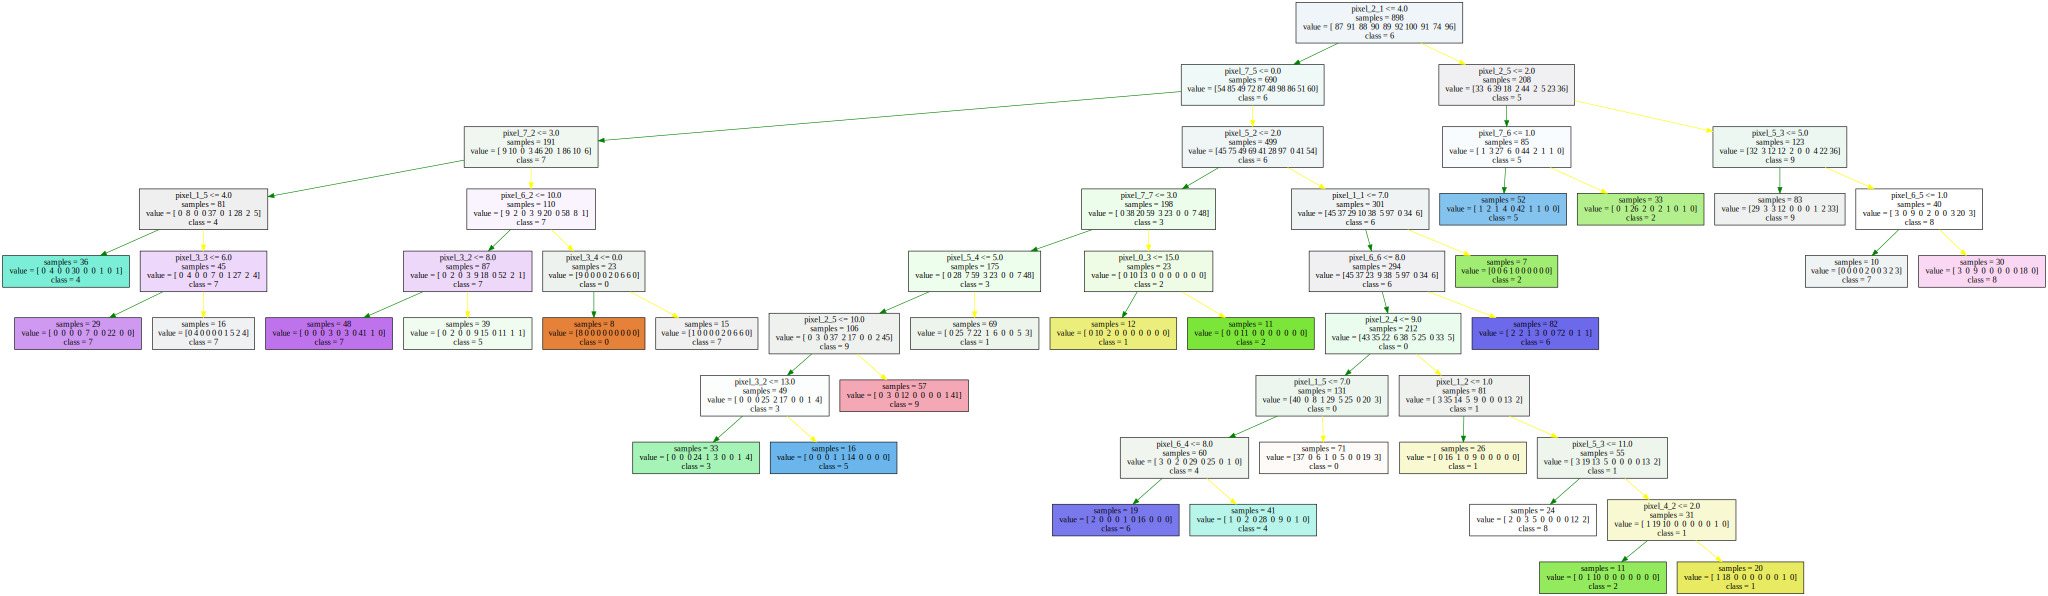

In [104]:
idx_test_max_digit2 = np.argmax(accuracy_digit_test2)
idx_train_max_digit2 = np.argmax(accuracy_digit_train2)
best_tree_digit2 = path_digit2[idx_test_max_digit2]
best_tree_digit2.set_labels(feature_name_digit,labels_names_digit)
print(accuracy_digit_test2[idx_test_max_digit2])
best_tree_digit2.graph_desiciontree()

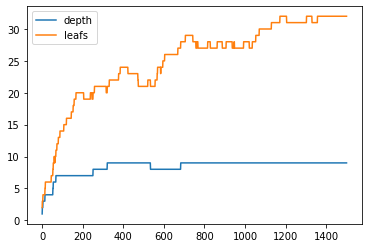

In [113]:
path_info_digit2 = bayesian_tree_digit2.path_info()
plt.plot(path_info_digit2[:,0] ,label="depth" )
plt.plot(path_info_digit2[:,1] ,label="leafs" )
plt.legend()

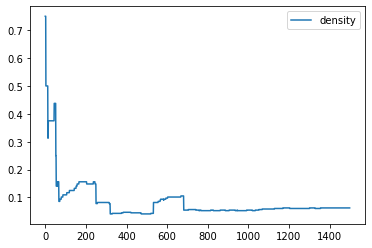

In [114]:
plt.plot(path_info_digit2[1:,1]/(2**path_info_digit2[1:,0]) ,label="density" )
plt.legend()

In [108]:
bayesian_tree_digit3 = BC.BayesianDecisionTree(alpha=0.01, beta= 0.5,prob = [0.1,0.1,0.4,0.4])
bayesian_tree_digit3.fit(1500,X_train_digit ,y_train_digit)

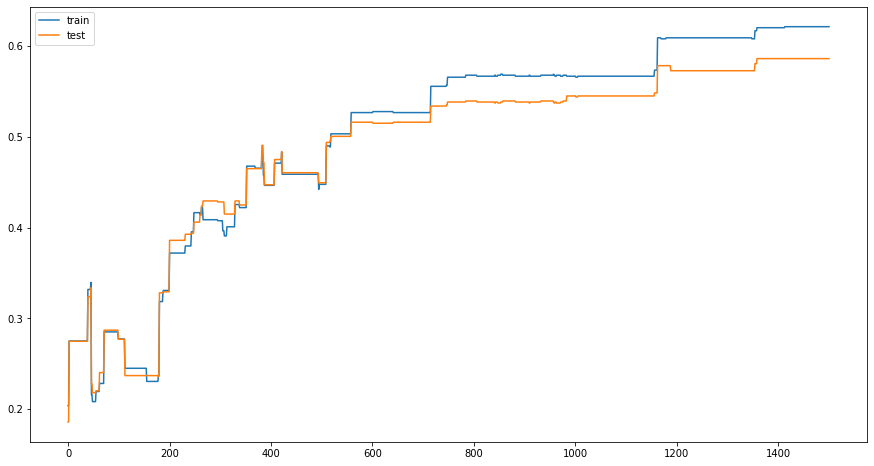

In [109]:
path_digit3 = bayesian_tree_digit3.path
accuracy_digit_test3 = bayesian_tree_digit3.path_acurracy(X_test_digit,y_test_digit)
accuracy_digit_train3 = bayesian_tree_digit3.path_acurracy(X_train_digit,y_train_digit)

figure = plt.figure(figsize = (15,8))
plt.plot(list(range(len(accuracy_digit_train3))), accuracy_digit_train3, label = "train")
plt.plot(list(range(len(accuracy_digit_test3))), accuracy_digit_test3, label = "test")
plt.legend()
# plt.xscale("log")

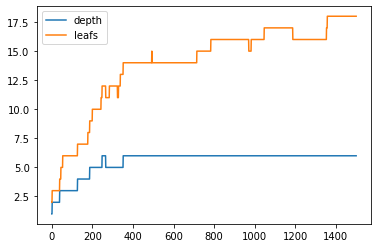

In [115]:
path_info_digit3 = bayesian_tree_digit3.path_info()
plt.plot(path_info_digit3[:,0] ,label="depth" )
plt.plot(path_info_digit3[:,1] ,label="leafs" )
plt.legend()

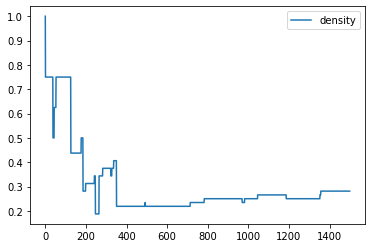

In [116]:
plt.plot(path_info_digit3[1:,1]/(2**path_info_digit3[1:,0]) ,label="density" )
plt.legend()

0.5862068965517241


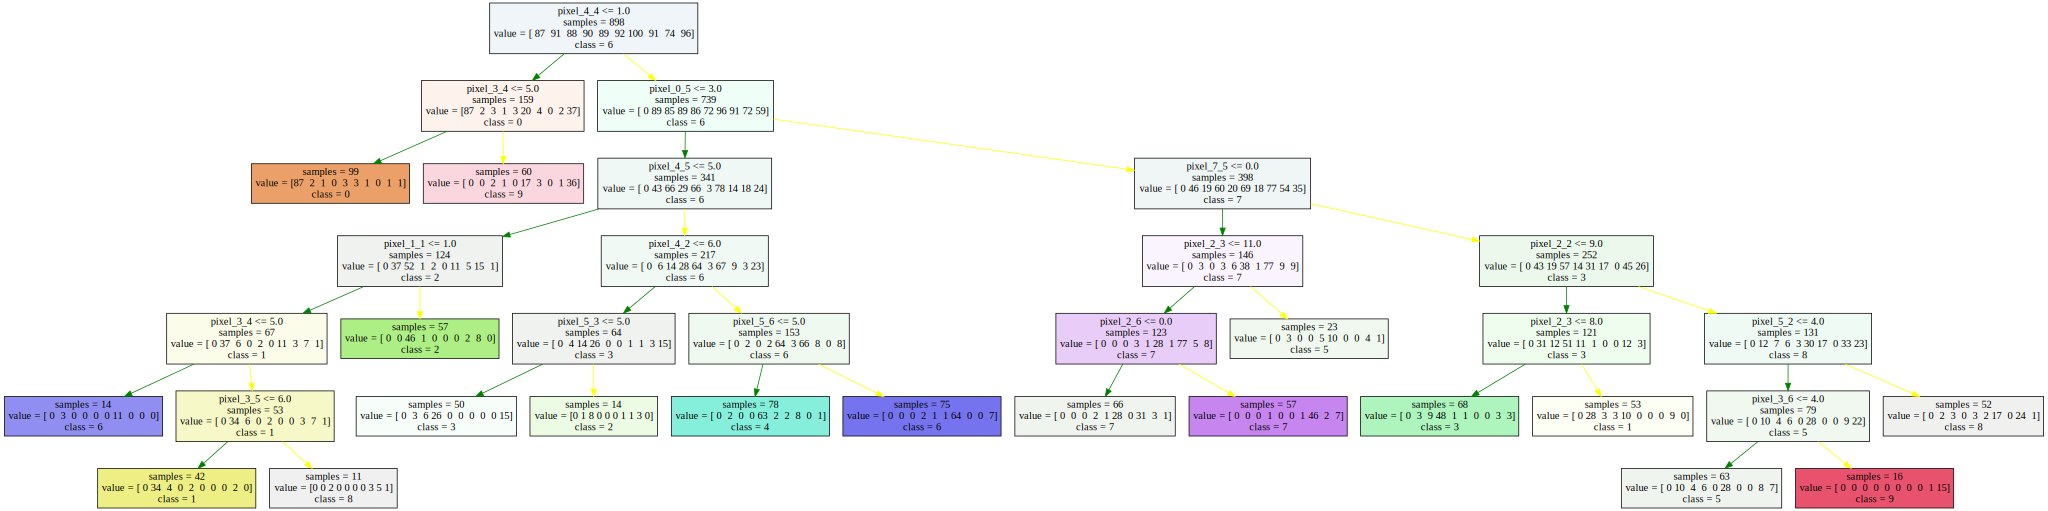

In [120]:
idx_test_max_digit3 = np.argmax(accuracy_digit_test3)
idx_train_max_digit3 = np.argmax(accuracy_digit_train3)
best_tree_digit3 = path_digit3[idx_test_max_digit3]
best_tree_digit3.set_labels(feature_name_digit,labels_names_digit)
print(accuracy_digit_test3[idx_test_max_digit3])
best_tree_digit3.graph_desiciontree()

In [121]:
bayesian_tree_digit_batch.fit_batch(20, 5,X_train_digit ,y_train_digit)

raw  111110100001100111100000101
camino  221
if
node split index : 13
vector stand: [0.06050994 0.05777536 0.05777536 0.0639118  0.06833671 0.0639118
 0.0639118  0.05550666 0.05550666 0.05777536 0.06050994 0.0639118
 0.07449647 0.06833671 0.0639118  0.0639118 ] 
vector stand: [0.05724101 0.05465417 0.05465417 0.05724101 0.05724101 0.06464496
 0.0604591  0.0604591  0.05250803 0.05250803 0.05465417 0.05724101
 0.0604591  0.07047195 0.06464496 0.0604591  0.0604591 ] 
vector stand: [0.05724101 0.05465417 0.05465417 0.05724101 0.05724101 0.06464496
 0.0604591  0.0604591  0.05250803 0.05250803 0.05465417 0.05724101
 0.0604591  0.07047195 0.06464496 0.0604591  0.0604591 ] 
vector stand: [0.05457439 0.05210806 0.05210806 0.05457439 0.05457439 0.06163343
 0.05764257 0.05764257 0.04832385 0.04832385 0.0500619  0.05210806
 0.05457439 0.05764257 0.06718896 0.06163343 0.05764257 0.05764257] 
prueba : 25.207011869982807
vector stand: [0.05190116 0.04955563 0.04955563 0.05190116 0.05190116 0.05861442

vector stand: [0.0454849  0.04342934 0.04342934 0.0454849  0.0454849  0.05136823
 0.0454849  0.0454849  0.04804206 0.03902228 0.03902228 0.0402754
 0.04172397 0.04342934 0.0454849  0.0454849  0.0454849  0.05599848
 0.05136823 0.04804206 0.0454849  0.0454849 ] 
prueba : -547.8323144913975
raw  
camino  
raw  11111010010001
camino  121
raw  11111010010001110001
camino  1221
raw  111
camino  111
raw  11111010010001
camino  121
raw  1
camino  1
raw  1111101001000111000111
camino  122111
raw  1111
camino  1111
raw  11111010010001
camino  121
raw  1111101001000111000111
camino  122111
raw  111110100100011100011111000000
camino  2
raw  111110100100011100011
camino  12211
Se intento mucho
vector stand: [0.05190116 0.04955563 0.04955563 0.05190116 0.05190116 0.05861442
 0.05190116 0.05190116 0.05481904 0.04595679 0.04595679 0.0476097
 0.04955563 0.05190116 0.05481904 0.06389783 0.05861442 0.05481904
 0.05481904] 
vector stand: [0.05190116 0.04955563 0.04955563 0.05190116 0.05190116 0.05861442
 

0.1935483870967742


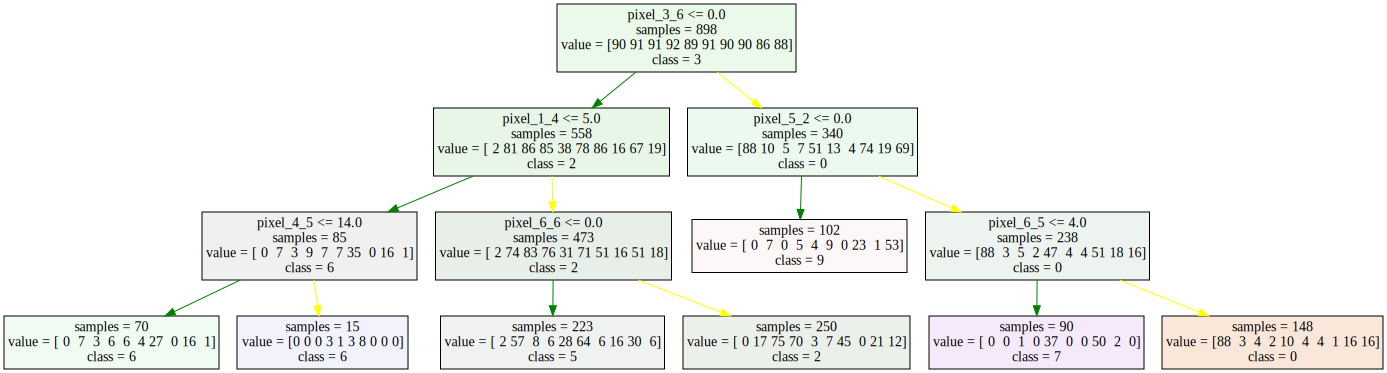

In [111]:
idx_test_max_digit_batch = np.argmax(accuracy_digit_test_batch)
idx_train_max_digit_batch = np.argmax(accuracy_digit_train_batch)
best_tree_digit_batch = path_digit_batch[idx_test_max_digit_batch]
best_tree_digit_batch.set_labels(feature_name_digit,labels_names_digit)
print(accuracy_digit_test_batch[idx_test_max_digit_batch])
best_tree_digit_batch.graph_desiciontree()

In [91]:
np.array(bayesian_tree_digit_batch.choices)[bayesian_tree_digit_batch.chosen]

C:\Users\jorge\AppData\Local\Temp/ipykernel_20196/2667462199.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(bayesian_tree_digit_batch.choices)[bayesian_tree_digit_batch.chosen]


array(['start', list(['prune', 'prune', 'prune']),
       list(['change', 'prune', 'change']),
       list(['change', 'change', 'swap']),
       list(['prune', 'prune', 'grow']),
       list(['grow', 'change', 'prune']),
       list(['change', 'change', 'prune']),
       list(['grow', 'grow', 'swap']), list(['prune', 'prune', 'grow']),
       list(['prune', 'grow', 'grow']), list(['grow', 'swap', 'grow']),
       list(['grow', 'grow', 'prune']), list(['swap', 'change', 'grow']),
       list(['change', 'grow', 'change']),
       list(['change', 'grow', 'change']),
       list(['prune', 'change', 'grow']), list(['swap', 'swap', 'grow']),
       list(['grow', 'swap', 'grow']), list(['prune', 'grow', 'prune']),
       list(['change', 'swap', 'change']),
       list(['grow', 'grow', 'prune']), list(['prune', 'grow', 'prune']),
       list(['grow', 'grow', 'grow']), list(['prune', 'grow', 'grow']),
       list(['prune', 'change', 'grow']), list(['grow', 'prune', 'swap']),
       list(['grow'